# general project

## Why use the laplace transform 
We use the Laplace transform because it turns a complicated system of differential equations into algebra, making it possible to solve a coupled mechanical system with initial conditions.
## why do we need to utilize the inverse laplace transform
Now the laplace basically describes the motion of two masses.
> X <sub> 1 </sub> and X <sub> 2 <sub>

However, this isnt over time, instead they are described in **laplace domain**. 



Due to this "caviat" there is multiple things we could not evaluate.
** What we CANT see (and/or model) **
1. displacement over time
2. Oscilations (since they happen over time)
3. Both masses moving in tandem
4. Overshoots
5. When both masses settle 
6. Propagation of natural conditions

Therefore our current task should be in essence to find the inverse laplace to evaluate the function over time.

### Use the function from the laplace modeling and then use the inverse
> $$
 X_1(s) =  \frac{ (0.0001677s^3-0.006476s^2+0.8569s+0.3328) }{ (0.4441s^4 + 1.8689s^3 + 89.5745s^2 + 147.429s + 3039.57)}
 $$

> $$
    X_2(s)= \frac{(0.02392s^3 - 0.1239s^2 + 147.429s +2.3942)} {(0.4441s^4 + 1.8689s^3 + 89.5745s^2 + 147.429s + 3039.57)}
    $$

Useing these two laplace transforms we can start trying to find the inverse laplace transform to write the models of the weights based on time.

In [1]:
# first lets try and get the roots of the denominator we do this via a method from the libery numpy
import numpy as np

#use the coeficients of the denominator
# 0.4441*s^4 + 1.8689*s^3 + 89.5745*s^2 + 147.429*s + 3039.57
coeffs = [0.4441, 1.8689, 89.5745, 147.429, 3039.57]

#get the roots using numpy 
roots = np.roots(coeffs)

print("The roots of the denominator are:")
for r in roots:
    print(r)

The roots of the denominator are:
(-1.4408641620027467+12.29326569071687j)
(-1.4408641620027467-12.29326569071687j)
(-0.6632790489857681+6.65099629098637j)
(-0.6632790489857681-6.65099629098637j)


In this case we get $$ −1.44086416±12.29326569j; -0.6632790489857681±6.65099629098637j $$ as our current roots (NOTE: the j is the equivalent of i so both are imaginaryvalues)

To find the laplace transform of our function we basically used partial fraction expansion:
$$
X(s)=\sum_{4}^{k=1} \frac{A_k} {s-s_k}
$$
In this function we use 
>$$ s_k 
$$

which are the roots of the denominatorand 
>$$ A_k $$

which are residues of the numeratos of the partial fractions which should follow the next procedure 
$$ A_k = Res{X(s), s=s_k}$$
which is why for inverse laplace we use 
$$ x(t)= \sum _{k=1}^{4} A_ke^{t*s_k} $$

Now based on the tecnicallity that our laplace transform is 

$$
X(s)=\frac{N(s)}{D(s)}
$$

and in the case of being near a simple pole \(s_k\).



$$
D(s_k)=0,
$$

which allows us to rewrite the following expression:

$$
D(s) = (s - s_k)\, Q(s)
$$

with

$$
Q(s_k) \neq 0.
$$

Then:

$$
X(s)=\frac{N(s)}{(s - s_k)\, Q(s)}.
$$

Write the local expansion:

$$
X(s)=\frac{A_k}{s - s_k} + \text{regular terms}.
$$

Multiply both sides by \((s - s_k)\):

$$
(s - s_k)\,X(s)=A_k + (s - s_k)\,\text{regular terms}.
$$

Now take the limit as \(s \to s_k\):

$$
A_k = \lim_{s \to s_k} (s - s_k)\, X(s).
$$

Substitute X(s)=N(s)/D(s):

$$
A_k = \lim_{s \to s_k} 
\frac{(s - s_k)N(s)}{(s - s_k)Q(s)}.
$$

Cancel the \((s - s_k)\):

$$
A_k = \frac{N(s_k)}{Q(s_k)}.
$$

And since

$$
Q(s)=\frac{D(s)}{s - s_k}
\qquad\Rightarrow\qquad
Q(s_k)=D'(s_k),
$$

we obtain the residue formula:

$$
\boxed{
A_k = \frac{N(s_k)}{D'(s_k)}
}
$$

This is the formula used in Python to compute the residues.

In [10]:
import numpy as np
import sympy as sp

# Symbols
s, t = sp.symbols('s t')

# Define numerator and denominator
num1 = 0.0001677*s**3 - 0.006476*s**2 + 0.8569*s + 0.3328
num2 = 0.02392*s**3 - 0.1239*s**2 + 147.429*s + 2.3942
den  = 0.4441*s**4 + 1.8689*s**3 + 89.5745*s**2 + 147.429*s + 3039.57

# 1. Numeric roots using numpy
coeffs = [0.4441, 1.8689, 89.5745, 147.429, 3039.57]
roots_np = np.roots(coeffs)

print("Numeric poles:")
print(roots_np)

# Convert numpy complex to sympy complex using sp.N()
sym_roots = [sp.N(r) for r in roots_np]

# Derivative of denominator
den_prime = sp.diff(den, s)

# 2. Compute residues using N(s_k) / D'(s_k)
residues_X1 = [
    sp.N(num1.subs(s, sym_roots[i]) / den_prime.subs(s, sym_roots[i]))
    for i in range(4)
]

residues_X2 = [
    sp.N(num2.subs(s, sym_roots[i]) / den_prime.subs(s, sym_roots[i]))
    for i in range(4)
]

print("\nResidues for X1(s):")
print(residues_X1)

print("\nResidues for X2(s):")
print(residues_X2)

# 3. Build x(t) = Σ A_k e^(s_k t)
x1_t = sum(residues_X1[i] * sp.exp(sym_roots[i] * t) for i in range(4))
x2_t = sum(residues_X2[i] * sp.exp(sym_roots[i] * t) for i in range(4))

print("\nx1(t):")
print(x1_t)

print("\nx2(t):")
print(x2_t)


Numeric poles:
[-1.44086416+12.29326569j -1.44086416-12.29326569j
 -0.66327905 +6.65099629j -0.66327905 -6.65099629j]

Residues for X1(s):
[-0.00870896824269133 + 0.00171511294576554*I, -0.00870896824269133 - 0.00171511294576554*I, 0.00889777706953211 - 0.000955029212729211*I, 0.00889777706953211 + 0.000955029212729211*I]

Residues for X2(s):
[-1.507302828721 + 0.119463301647024*I, -1.507302828721 - 0.119463301647024*I, 1.53423370014635 - 0.00925757848304954*I, 1.53423370014635 + 0.00925757848304954*I]

x1(t):
(-0.00870896824269133 - 0.00171511294576554*I)*exp(t*(-1.44086416200275 - 12.2932656907169*I)) + (-0.00870896824269133 + 0.00171511294576554*I)*exp(t*(-1.44086416200275 + 12.2932656907169*I)) + (0.00889777706953211 + 0.000955029212729211*I)*exp(t*(-0.663279048985768 - 6.65099629098637*I)) + (0.00889777706953211 - 0.000955029212729211*I)*exp(t*(-0.663279048985768 + 6.65099629098637*I))

x2(t):
(-1.507302828721 - 0.119463301647024*I)*exp(t*(-1.44086416200275 - 12.2932656907169*I)) 

NOTE : I is the same as i from imaginary numbers just thats how it looks in numpy

# Time for modeling using the ranga kutta method 

Folowing the syntaxis of runga kutta for an integration method and evaluate how close it is with the true equation found : 

In [ ]:
import numpy as np
# Convert sympy results to numpy complex values
poles = np.array([complex(r) for r in roots_np])
R1 = np.array([complex(r) for r in residues_X1])
R2 = np.array([complex(r) for r in residues_X2])
#Convert initial x1(t) and x2(t) to a numerical function to evaluate via a step x step integration method using the fact that its a e^(pt)
def x1(t):
    return np.sum(R1 * np.exp(poles * t))

def x2(t):
    return np.sum(R2 * np.exp(poles * t))

#Equate derivatives to utilize runga kutta (we can just multiply by poles since the rule of derivation of exponential is the same exponential multiplied by the derivative of the exponent)
def dx1_dt(t):
    return np.sum(poles * R1 * np.exp(poles * t))
def dx2_dt(t):
    return np.sum(poles * R2 * np.exp(poles * t))




In [19]:
#We need to define the ODE for a runga kutta level 4 (was chossen since it the basic one for college level) :D
def f(t, X):
    return np.array([dx1_dt(t), dx2_dt(t)], dtype=complex)
# four step runga kutta method 
def rk4_step(f, t, X, h):
    k1 = f(t, X)
    k2 = f(t + h/2, X + h*k1/2)
    k3 = f(t + h/2, X + h*k2/2)
    k4 = f(t + h,   X + h*k3)
    return X + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

def simulate_rk4(t0, tf, h):
    ts = np.arange(t0, tf + h, h)
    X  = np.zeros((len(ts), 2), dtype=complex)

    # initial conditions from your exact x1(t), x2(t)
    X[0,0] = x1(t0)
    X[0,1] = x2(t0)

    for i in range(1, len(ts)):
        X[i] = rk4_step(f, ts[i-1], X[i-1], h)

    return ts, X
# actuator to simulate fourth level runga kutta 
ts, Xs = simulate_rk4(0, 10, 0.001)

x1_rk = Xs[:,0]
x2_rk = Xs[:,1]
print("from 0 to 10 with 0.001 steps x1_rk(t)=")

print(x1_rk[:10])

print("from 0 to 10 with 0.001 steps x2_rk(t)=")
print(x2_rk[:10])



from 0 to 10 with 0.001 steps x1_rk(t)=
[0.00037762+0.j 0.00036241+0.j 0.00034911+0.j 0.00033773+0.j
 0.00032825+0.j 0.00032068+0.j 0.000315  +0.j 0.00031122+0.j
 0.00030931+0.j 0.00030928+0.j]
from 0 to 10 with 0.001 steps x2_rk(t)=
[0.05386174+0.j 0.05351749+0.j 0.05349517+0.j 0.05379342+0.j
 0.05441082+0.j 0.05534589+0.j 0.0565971 +0.j 0.05816285+0.j
 0.06004149+0.j 0.06223131+0.j]


Check if numerical matches actuall (real) exact values


In [16]:
x1_true = np.array([x1(t) for t in ts])
x2_true = np.array([x2(t) for t in ts])

print("x1_true (first 10):")
print(np.round(x1_true[:10], 8))

print("x2_true (first 10):")
print(np.round(x2_true[:10], 8))


x1_true (first 10):
[0.00037762+0.j 0.00036241+0.j 0.00034911+0.j 0.00033773+0.j
 0.00032825+0.j 0.00032068+0.j 0.000315  +0.j 0.00031122+0.j
 0.00030931+0.j 0.00030928+0.j]
x2_true (first 10):
[0.05386174+0.j 0.05351749+0.j 0.05349517+0.j 0.05379342+0.j
 0.05441082+0.j 0.05534589+0.j 0.0565971 +0.j 0.05816285+0.j
 0.06004149+0.j 0.06223131+0.j]



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


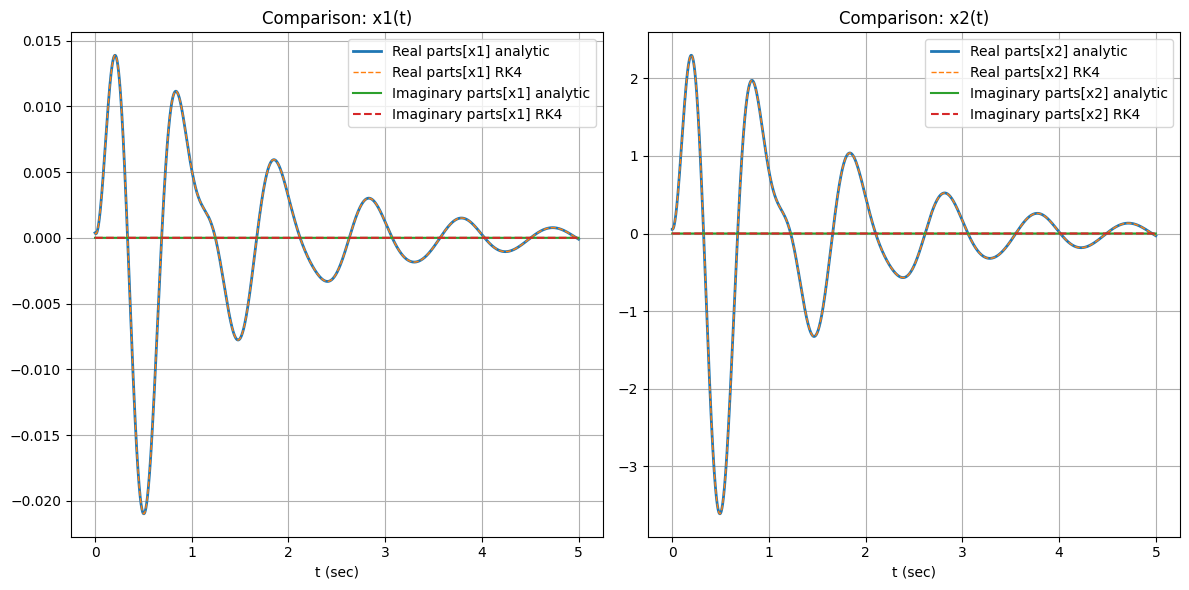

In [28]:
import sys
!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt

#
# 1. Time domain
#
t0 = 0
tf = 5
h  = 0.001

ts = np.arange(t0, tf + h, h)

#
# 2. Analytical values
#
x1_analytic = np.array([x1(t) for t in ts])
x2_analytic = np.array([x2(t) for t in ts])

# 
# 3. Numerical RK4 simulation
#
ts_rk, X_rk = simulate_rk4(t0, tf, h)
x1_rk = X_rk[:,0]
x2_rk = X_rk[:,1]

#
# 4. Plot results
#x(t)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(ts, x1_analytic.real, label="Real parts[x1] analytic", linewidth=2)
plt.plot(ts_rk, x1_rk.real, '--', label="Real parts[x1] RK4", linewidth=1)
plt.plot(ts, x1_analytic.imag, label="Imaginary parts[x1] analytic")
plt.plot(ts_rk, x1_rk.imag, '--', label="Imaginary parts[x1] RK4")
plt.title("Comparison: x1(t)")
plt.xlabel("t (sec)")
plt.grid(True)
plt.legend()

#  x2(t)
plt.subplot(1,2,2)
plt.plot(ts, x2_analytic.real, label="Real parts[x2] analytic", linewidth=2)
plt.plot(ts_rk, x2_rk.real, '--', label="Real parts[x2] RK4", linewidth=1)
plt.plot(ts, x2_analytic.imag, label="Imaginary parts[x2] analytic")
plt.plot(ts_rk, x2_rk.imag, '--', label="Imaginary parts[x2] RK4")
plt.title("Comparison: x2(t)")
plt.xlabel("t (sec)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
